<a href="https://colab.research.google.com/github/CHIKU1799/Example/blob/main/Netflix_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Scapping from Youtube:**

In [2]:
pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
pip install --upgrade google-api-python-client google-auth google-auth-oauthlib google-auth-httplib2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.6 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.155.0
    Uninstalling google-api-python-client-2.155.0:
      Successfully uninstalled google-api-python-client-2.155.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.27.0, but you have google-auth 2.38.0 which is incompatible.


In [4]:
!pip install nltk


In [11]:
import pandas as pd
import nltk
from googleapiclient.discovery import build
from google.colab import files
from nltk.sentiment import SentimentIntensityAnalyzer

# 🔹 Download VADER Lexicon for Sentiment Analysis
nltk.download('vader_lexicon')

# ✅ Replace with your API Key & Video ID
API_KEY = "xxxxxxx"
VIDEO_ID = "FNWhq5nyS48"

# ✅ 1. Function to Get Comments from YouTube
def get_comments(video_id, max_results=100):
    youtube = build("youtube", "v3", developerKey=API_KEY)
    comments_data = []
    next_page_token = None

    while len(comments_data) < max_results:
        response = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,
            pageToken=next_page_token
        ).execute()

        for item in response["items"]:
            comment = item["snippet"]["topLevelComment"]["snippet"]
            comment_id = item["snippet"]["topLevelComment"]["id"]
            user_name = comment["authorDisplayName"]
            date = comment["publishedAt"]
            text = comment["textDisplay"]
            comments_data.append([comment_id, user_name, date, text])

        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break

    return comments_data

# ✅ 2. Sentiment Analysis Function
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']  # Get compound score

    # Classify as Good (1) or Bad (0)
    if sentiment_score >= 0:
        return 0  # Ham comment
    else:
        return 1  # Spam comment

# ✅ 3. Get YouTube Comments & Classify Sentiment
comments_data = get_comments(VIDEO_ID, max_results=100)

# Extract required details
comment_ids = [data[0] for data in comments_data]
usernames = [data[1] for data in comments_data]
dates = [data[2] for data in comments_data]
comments = [data[3] for data in comments_data]

# Classify sentiment for each comment
sentiment_labels = [analyze_sentiment(comment) for comment in comments]

# ✅ 4. Save Results to CSV with Required Columns
df = pd.DataFrame({
    "COMMENT_ID": comment_ids,
    "AUTHOR": usernames,
    "DATE": dates,
    "CONTENT": comments,
    "CLASS": sentiment_labels
})

df.to_csv("youtube_sentiment_analysis_with_class.csv", index=False)
files.download("youtube_sentiment_analysis_with_class.csv")

print("✅ Sentiment classification with required columns completed. Check your CSV file.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Sentiment classification with required columns completed. Check your CSV file.


**Note:** Video url: https://www.youtube.com/watch?v=ABC123xyz
Video ID: ABC123xyz

In [5]:
import os
import pandas as pd

# Define the folder path containing your CSV files
folder_path = r'/content/sample_data/youtube_dataset'  # Change this to your folder path

# Define the old and new years to replace
old_years = ['2013', '2014', '2015', '2016']  # Renamed to old_years for clarity
new_year = '2024'

# Loop through all CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Check for CSV files
        file_path = os.path.join(folder_path, file_name)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Check if the 'DATE' column exists
        if 'DATE' in df.columns:
            # Replace old years with new year in the 'DATE' column
            # Iterate through each old year and replace it if found
            for old_year in old_years:
                df['DATE'] = df['DATE'].str.replace(old_year, new_year)

            # Write the updated DataFrame back to the CSV file
            df.to_csv(file_path, index=False)

        print(f"Updated dates in {file_name}")

Updated dates in Youtube05.csv
Updated dates in Youtube03.csv
Updated dates in Youtube01.csv
Updated dates in Youtube04.csv
Updated dates in Youtube02.csv


# **Multinomial Naive Bayes Classifer: HAM/SPAM Classifer**


Link for data: https://drive.google.com/drive/folders/1d8MLYzDEBXBELrb_vEh2WlaYabiHRYGZ?usp=drive_link

Go to this link and save it in your google drive.

**Importing the necessary libraries**

In [2]:
import pandas as pd
import glob
#what is pandas?
#what is sklearn?
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

### Mounting Google drive to directly access the folder

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
folder_path='/content/drive/MyDrive/youtube-dataset/'


### **glob: Use case**

In [5]:
files = glob.glob(folder_path + "*.csv")
files

['/content/drive/MyDrive/youtube-dataset/Youtube05.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube01.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube02.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube03.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube04.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube000.csv']

In [6]:
all_df = []

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1))

In [7]:
all_df[1]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [8]:
len(all_df)

6

In [9]:
data = pd.concat(all_df, axis=0, ignore_index=True)
data

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0
...,...,...
2050,Mandala murder delhi crime 3 and kohra 2 and t...,1
2051,Delhi crime is back 🔥,1
2052,Jeet,0
2053,Did I see Radhika apte?,0


In [10]:
data.isnull().sum()

,0
CONTENT,0
CLASS,0


In [11]:
data['CLASS'].value_counts()


,count
CLASS,
0,1038
1,1017


### Defining the inputs and the target. Creating the train-test split.

In [12]:
inputs = data['CONTENT']
target = data['CLASS']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=365,
                                                    stratify = target)

In [14]:
y_train.value_counts()

,count
CLASS,
0,830
1,814


In [15]:
y_test.value_counts()

,count
CLASS,
0,208
1,203


SAMPLE

In [16]:
message_sample = ['This is a dog']
msg_sample3=['This  bbadass']

vectorizer_sample = CountVectorizer()

vectorizer_sample.fit(message_sample)

CountVectorizer()

In [46]:
vectorizer_sample.transform(message_sample).toarray()
vectorizer_sample.transform(msg_sample3).toarray()

array([[0, 0, 1]])

In [19]:
vectorizer_sample2=CountVectorizer()
vectorizer_sample2.fit_transform(['This is a cat']).toarray()

array([[1, 1, 1]])

In [20]:
message_sample2= ['this is a cat', 'This is a cat']
vectorizer_sample3=CountVectorizer()
vectorizer_sample3.fit_transform(message_sample2).toarray()

array([[1, 1, 1],
       [1, 1, 1]])

### Tokenization

In [17]:
vectorizer = CountVectorizer()

In [18]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [19]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
x_train_transf.shape

(1644, 4024)

In [21]:
x_test_transf.shape

(411, 4024)

### Performing the classification

In [23]:
clf = MultinomialNB()
# clf = MultinomialNB(class_prior = np.array([0.6, 0.4]),fit_prior=False)

clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]), fit_prior=False)

In [24]:
np.exp(clf.class_log_prior_)

array([0.6, 0.4])

In [25]:
clf.get_params()

{'alpha': 1.0,
 'class_prior': array([0.6, 0.4]),
 'fit_prior': False,
 'force_alpha': True}

In [26]:
y_test_pred = clf.predict(x_test_transf)

### Performing the evaluation on the test dataset

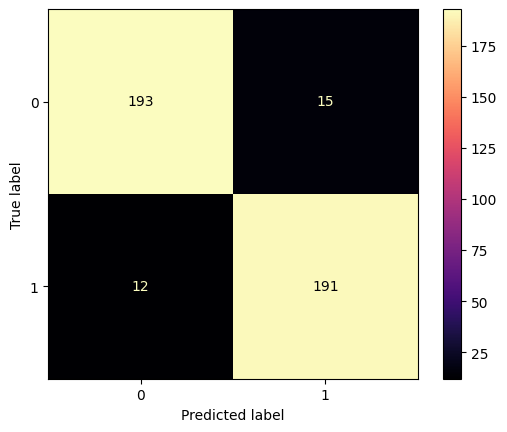

In [27]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [28]:
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.93      0.93       208
        Spam       0.93      0.94      0.93       203

    accuracy                           0.93       411
   macro avg       0.93      0.93      0.93       411
weighted avg       0.93      0.93      0.93       411



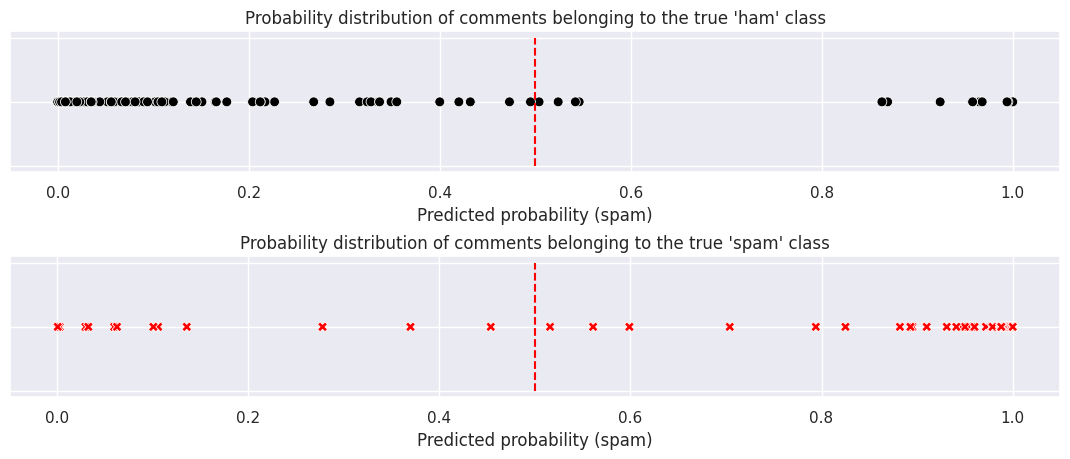

In [29]:
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0.shape[0]),
                data = df_scatter_0,
                hue = 'True class',
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False,
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_1.shape[0]),
                hue = 'True class',
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False,
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

In [30]:
predict_data = vectorizer.transform(['This announcement looks amazing, Good job Netflix!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [31]:
clf.predict(predict_data)

array([0, 1])